In [93]:
from darts.datasets import *
from darts.models.forecasting.pl_forecasting_module import (
    PLPastCovariatesModule,
    io_processor,)
from sklearn.preprocessing import MaxAbsScaler, StandardScaler, MinMaxScaler
from darts.dataprocessing.transformers import BoxCox, Scaler

from darts.models.forecasting.torch_forecasting_model import PastCovariatesTorchModel
import torch
import torch.nn as nn
from models.BaseModel import BaseModel
from models.PatchTSTModel import PatchTSTModel
from models.SCINetModel import SCINetModel
from models.FreTSModel import FreTSModel

# data loading

In [6]:
series = ElectricityConsumptionZurichDataset().load()

<Axes: xlabel='Timestamp'>

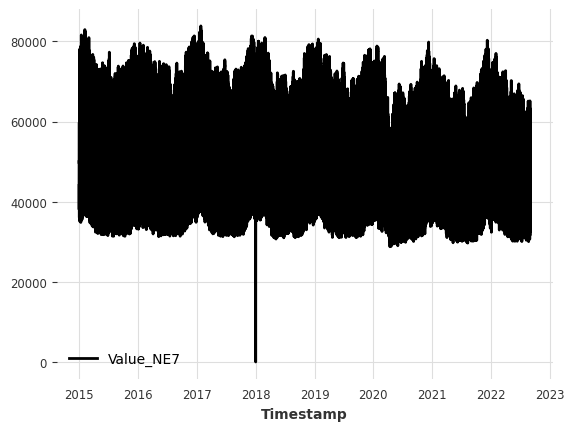

In [7]:
series['Value_NE7'].plot()

In [ ]:
target = series['Value_NE5'][:10000]
target_long = series['Value_NE5'][:20000]
val = series['Value_NE5'][10000: 15000]

In [ ]:
target = series['Value_NE5'][:10000]
target_long = series['Value_NE5'][:20000]
val = series['Value_NE5'][10000: 15000]

In [ ]:
scaler_type = StandardScaler()
scaler = Scaler(scaler=scaler_type, global_fit=True)
target_scaled = scaler.fit_transform(target)
target_long_scaled = scaler.transform(target_long)
val_scaled = scaler.transform(val)

# Base model

In [11]:
model = BaseModel(input_chunk_length=4*24, output_chunk_length=4*24, hidden_size=2048, n_epochs = 10)

In [12]:
model.fit(target)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type             | Params
-----------------------------------------------------
0 | criterion       | MSELoss          | 0     
1 | train_criterion | MSELoss          | 0     
2 | val_criterion   | MSELoss          | 0     
3 | train_metrics   | MetricCollection | 0     
4 | val_metrics     | MetricCollection | 0     
5 | hidden          | Linear           | 4.1 K 
6 | activation      | ReLU             | 0     
7 | output          | Linear           | 2.0 K 
-----------------------------------------------------
6.1 K     Trainable params
0         Non-trainable params
6.1 K     Total params
0.025     Total estimated model params size (MB)


Training: |          | 0/? [00:00<?, ?it/s]

shape 1 :  torch.Size([32, 96, 1])
shape 2 :  torch.Size([96, 32, 1])
shape 3 :  torch.Size([32, 96, 1, 1])
shape 1 :  torch.Size([32, 96, 1])
shape 2 :  torch.Size([96, 32, 1])
shape 3 :  torch.Size([32, 96, 1, 1])
shape 1 :  torch.Size([32, 96, 1])
shape 2 :  torch.Size([96, 32, 1])
shape 3 :  torch.Size([32, 96, 1, 1])
shape 1 :  torch.Size([32, 96, 1])
shape 2 :  torch.Size([96, 32, 1])
shape 3 :  torch.Size([32, 96, 1, 1])
shape 1 :  torch.Size([32, 96, 1])
shape 2 :  torch.Size([96, 32, 1])
shape 3 :  torch.Size([32, 96, 1, 1])
shape 1 :  torch.Size([32, 96, 1])
shape 2 :  torch.Size([96, 32, 1])
shape 3 :  torch.Size([32, 96, 1, 1])
shape 1 :  torch.Size([32, 96, 1])
shape 2 :  torch.Size([96, 32, 1])
shape 3 :  torch.Size([32, 96, 1, 1])
shape 1 :  torch.Size([32, 96, 1])
shape 2 :  torch.Size([96, 32, 1])
shape 3 :  torch.Size([32, 96, 1, 1])
shape 1 :  torch.Size([32, 96, 1])
shape 2 :  torch.Size([96, 32, 1])
shape 3 :  torch.Size([32, 96, 1, 1])
shape 1 :  torch.Size([32, 9

`Trainer.fit` stopped: `max_epochs=10` reached.


shape 1 :  torch.Size([32, 96, 1])
shape 2 :  torch.Size([96, 32, 1])
shape 3 :  torch.Size([32, 96, 1, 1])
shape 1 :  torch.Size([32, 96, 1])
shape 2 :  torch.Size([96, 32, 1])
shape 3 :  torch.Size([32, 96, 1, 1])
shape 1 :  torch.Size([9, 96, 1])
shape 2 :  torch.Size([96, 9, 1])
shape 3 :  torch.Size([9, 96, 1, 1])


BaseModel(hidden_size=2048, output_chunk_shift=0, input_chunk_length=96, output_chunk_length=96, n_epochs=10)

In [13]:
pred = model.predict(24*6)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

shape 1 :  torch.Size([1, 96, 1])
shape 2 :  torch.Size([96, 1, 1])
shape 3 :  torch.Size([1, 96, 1, 1])
shape 1 :  torch.Size([1, 96, 1])
shape 2 :  torch.Size([96, 1, 1])
shape 3 :  torch.Size([1, 96, 1, 1])


<Axes: xlabel='Timestamp'>

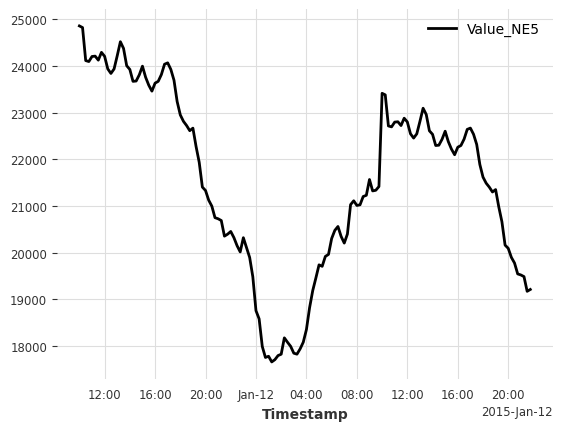

In [14]:
pred.plot()

# Patch TST 

In [17]:
model = PatchTSTModel(output_chunk_length =  4*24, input_chunk_length =  4*24, n_epochs=5)

In [20]:
model.fit(target_scaled, val_series=val_scaled, )

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type              | Params
------------------------------------------------------
0 | criterion       | MSELoss           | 0     
1 | train_criterion | MSELoss           | 0     
2 | val_criterion   | MSELoss           | 0     
3 | train_metrics   | MetricCollection  | 0     
4 | val_metrics     | MetricCollection  | 0     
5 | model           | PatchTST_backbone | 25.8 M
------------------------------------------------------
25.8 M    Trainable params
8         Non-trainable params
25.8 M    Total params
103.295   Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

size torch.Size([32, 96, 1])
size torch.Size([32, 96, 1])


Training: |          | 0/? [00:00<?, ?it/s]

size torch.Size([32, 96, 1])
size torch.Size([32, 96, 1])
size torch.Size([32, 96, 1])
size torch.Size([32, 96, 1])
size torch.Size([32, 96, 1])
size torch.Size([32, 96, 1])
size torch.Size([32, 96, 1])
size torch.Size([32, 96, 1])
size torch.Size([32, 96, 1])
size torch.Size([32, 96, 1])
size torch.Size([32, 96, 1])
size torch.Size([32, 96, 1])
size torch.Size([32, 96, 1])
size torch.Size([32, 96, 1])
size torch.Size([32, 96, 1])
size torch.Size([32, 96, 1])
size torch.Size([32, 96, 1])
size torch.Size([32, 96, 1])
size torch.Size([32, 96, 1])
size torch.Size([32, 96, 1])
size torch.Size([32, 96, 1])
size torch.Size([32, 96, 1])
size torch.Size([32, 96, 1])
size torch.Size([32, 96, 1])
size torch.Size([32, 96, 1])
size torch.Size([32, 96, 1])
size torch.Size([32, 96, 1])
size torch.Size([32, 96, 1])
size torch.Size([32, 96, 1])
size torch.Size([32, 96, 1])
size torch.Size([32, 96, 1])
size torch.Size([32, 96, 1])
size torch.Size([32, 96, 1])
size torch.Size([32, 96, 1])
size torch.Siz

Validation: |          | 0/? [00:00<?, ?it/s]

size torch.Size([32, 96, 1])
size torch.Size([32, 96, 1])
size torch.Size([32, 96, 1])
size torch.Size([32, 96, 1])
size torch.Size([32, 96, 1])
size torch.Size([32, 96, 1])
size torch.Size([32, 96, 1])
size torch.Size([32, 96, 1])
size torch.Size([32, 96, 1])
size torch.Size([32, 96, 1])
size torch.Size([32, 96, 1])
size torch.Size([32, 96, 1])
size torch.Size([32, 96, 1])
size torch.Size([32, 96, 1])
size torch.Size([32, 96, 1])
size torch.Size([32, 96, 1])
size torch.Size([32, 96, 1])
size torch.Size([32, 96, 1])
size torch.Size([32, 96, 1])
size torch.Size([32, 96, 1])
size torch.Size([32, 96, 1])
size torch.Size([32, 96, 1])
size torch.Size([32, 96, 1])
size torch.Size([32, 96, 1])
size torch.Size([32, 96, 1])
size torch.Size([32, 96, 1])
size torch.Size([32, 96, 1])
size torch.Size([32, 96, 1])
size torch.Size([32, 96, 1])
size torch.Size([32, 96, 1])
size torch.Size([32, 96, 1])
size torch.Size([32, 96, 1])
size torch.Size([32, 96, 1])
size torch.Size([32, 96, 1])
size torch.Siz

Validation: |          | 0/? [00:00<?, ?it/s]

size torch.Size([32, 96, 1])
size torch.Size([32, 96, 1])
size torch.Size([32, 96, 1])
size torch.Size([32, 96, 1])
size torch.Size([32, 96, 1])
size torch.Size([32, 96, 1])
size torch.Size([32, 96, 1])
size torch.Size([32, 96, 1])
size torch.Size([32, 96, 1])
size torch.Size([32, 96, 1])
size torch.Size([32, 96, 1])
size torch.Size([32, 96, 1])
size torch.Size([32, 96, 1])
size torch.Size([32, 96, 1])
size torch.Size([32, 96, 1])
size torch.Size([32, 96, 1])
size torch.Size([32, 96, 1])
size torch.Size([32, 96, 1])
size torch.Size([32, 96, 1])
size torch.Size([32, 96, 1])
size torch.Size([32, 96, 1])
size torch.Size([32, 96, 1])
size torch.Size([32, 96, 1])
size torch.Size([32, 96, 1])
size torch.Size([32, 96, 1])
size torch.Size([32, 96, 1])
size torch.Size([32, 96, 1])
size torch.Size([32, 96, 1])
size torch.Size([32, 96, 1])
size torch.Size([32, 96, 1])
size torch.Size([32, 96, 1])
size torch.Size([32, 96, 1])
size torch.Size([32, 96, 1])
size torch.Size([32, 96, 1])
size torch.Siz

/home/mbesson/miniconda3/envs/Ariac_venv/lib/python3.10/site-packages/pytorch_lightning/trainer/call.py:54: Detected KeyboardInterrupt, attempting graceful shutdown...


PatchTSTModel(output_chunk_shift=0, enc_in=7, n_layers=8, n_heads=8, d_model=512, d_ff=2048, fc_dropout=0.05, dropout=0.05, head_dropout=0, individual=0, patch_len=16, stride=8, padding_patch=end, revin=0, affine=0, subtract_last=0, decomposition=0, kernel_size=25, output_chunk_length=96, input_chunk_length=96, n_epochs=5)

In [44]:
pred = model.predict(24*4)

ValueError: This model has been trained without past or future covariates. No past or future covariates should be provided for prediction.


ValueError: This model has been trained without past or future covariates. No past or future covariates should be provided for prediction.

In [42]:
pred.plot()
target_long_scaled[10000 : 10000 + 4*24].plot()

NameError: name 'pred' is not defined

# SCINet 

In [46]:
model = SCINetModel(output_chunk_length =  4*24, input_chunk_length =  4*24, n_epochs=5)

In [47]:
model.fit(target_scaled )

NameError: name 'SCINetModule' is not defined

In [12]:
pred = model.predict(24*4)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

1


<Axes: xlabel='Timestamp'>

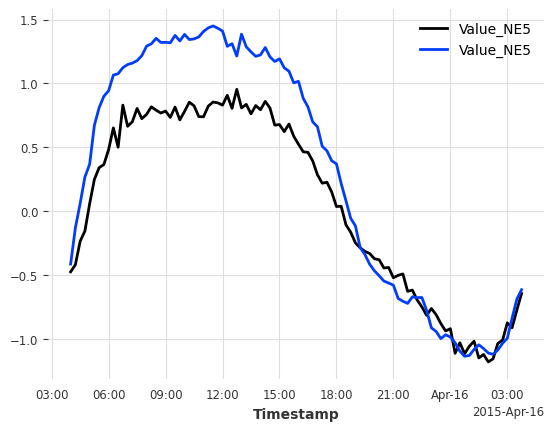

In [13]:
pred.plot()
target_long_scaled[10000 : 10000 + 4*24].plot()

# FreTS

In [55]:
model = FreTSModel(output_chunk_length =  4*24, input_chunk_length =  7 * 4*24, n_epochs=15)

In [56]:
model.fit(target_scaled )

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type             | Params
-----------------------------------------------------
0 | criterion       | MSELoss          | 0     
1 | train_criterion | MSELoss          | 0     
2 | val_criterion   | MSELoss          | 0     
3 | train_metrics   | MetricCollection | 0     
4 | val_metrics     | MetricCollection | 0     
5 | fc              | Sequential       | 22.0 M
  | other params    | n/a              | 66.2 K
-----------------------------------------------------
22.1 M    Trainable params
0         Non-trainable params
22.1 M    Total params
88.445    Total estimated model params size (MB)


Training: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=15` reached.


FreTSModel(output_chunk_shift=0, channel_independence=1, embed_size=128, hidden_size=256, output_chunk_length=96, input_chunk_length=672, n_epochs=15)

In [57]:
pred = model.predict(24*4)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

<Axes: xlabel='Timestamp'>

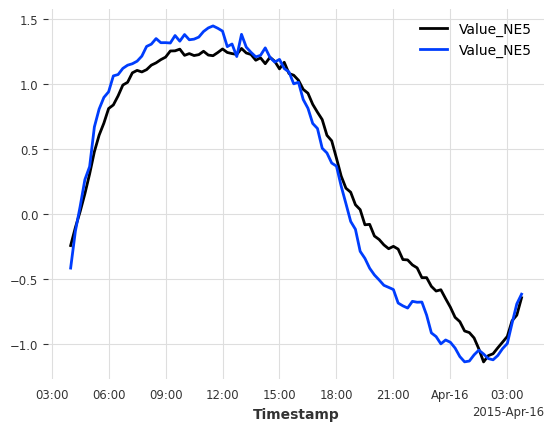

In [58]:
pred.plot()
target_long_scaled[10000 : 10000 + 4*24].plot()

In [79]:
model = FreTSModel(output_chunk_length =  4*24, input_chunk_length =  4*24, n_epochs=10)

In [80]:
model.fit(target_scaled , future_covariates=series['Value_NE7'])

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name                  | Type             | Params
------------------------------------------------------------
0  | criterion             | MSELoss          | 0     
1  | train_criterion       | MSELoss          | 0     
2  | val_criterion         | MSELoss          | 0     
3  | train_metrics         | MetricCollection | 0     
4  | val_metrics           | MetricCollection | 0     
5  | fc                    | Sequential       | 3.2 M 
6  | fc_hist               | Linear           | 9.3 K 
7  | feature_mixing_hist   | _FeatureMixing   | 66.8 K
8  | feature_mixing_future | _FeatureMixing   | 66.4 K
9  | conditional_mixer     | ModuleList       | 478 K 
10 | fc_out                | Linear           | 257   
   | other params          | n/a              | 66.2 K
-----------------------------

Training: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=10` reached.


FreTSModel(output_chunk_shift=0, channel_independence=1, embed_size=128, hidden_size=256, ff_size=64, num_blocks=2, activation=ReLU, dropout=0.1, norm_type=LayerNorm, normalize_before=False, use_static_covariates=True, output_chunk_length=96, input_chunk_length=96, n_epochs=10)

In [88]:
pred = model.predict(18 * 24*4, future_covariates=series['Value_NE7'])

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

<Axes: xlabel='Timestamp'>

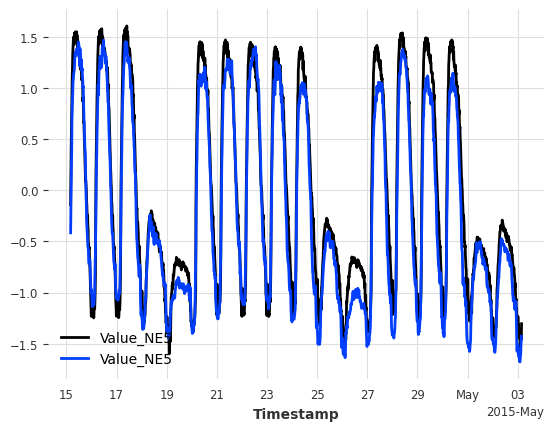

In [90]:
pred.plot()
target_long_scaled[10000 : 10000 + 18* 4*24].plot()